In [18]:
!pip install --upgrade pip



In [19]:
!pip install scikit-fuzzy > /dev/null 2>&1


In [20]:
import skfuzzy as fuzz
import numpy as np


In [21]:
# Dirt
dirt_universe = np.arange(0, 100, 1)

# Grease
grease_universe = np.arange(0, 50, 1)

# Wash time
wash_time_universe = np.arange(0, 60, 1)

In [22]:
from skfuzzy import control

In [23]:
# Dirt

dirt = control.Antecedent(dirt_universe, 'dirt')

dirt['VSD'] = fuzz.trimf(dirt_universe, [0, 0, 25])
dirt['SD'] = fuzz.trimf(dirt_universe, [0, 25, 50])
dirt['MD'] = fuzz.trimf(dirt_universe, [25, 50, 75])
dirt['HD'] = fuzz.trimf(dirt_universe, [50, 75, 100])
dirt['VHD'] = fuzz.trimf(dirt_universe, [75, 100, 100])

# Grease

grease = control.Antecedent(grease_universe, 'grease')

grease['SG'] = fuzz.trimf(grease_universe, [0, 0, 25])
grease['MG'] = fuzz.trimf(grease_universe, [0, 25, 50])
grease['HG'] = fuzz.trimf(grease_universe, [25, 50, 50])

# Wash time

wash_time = control.Consequent(wash_time_universe, 'wash_time')

wash_time['VST'] = fuzz.trimf(wash_time_universe, [0, 0, 15])
wash_time['ST'] = fuzz.trimf(wash_time_universe, [0, 15, 30])
wash_time['MT'] = fuzz.trimf(wash_time_universe, [15, 30, 45])
wash_time['HT'] = fuzz.trimf(wash_time_universe, [30, 45, 60])
wash_time['VHT'] = fuzz.trimf(wash_time_universe, [45, 60, 60])


In [24]:
# Defining the rules
rule_1 = control.Rule(
    antecedent=(dirt["VSD"] & grease["SG"]), consequent=wash_time["VST"]
)
rule_2 = control.Rule(dirt["VSD"] & grease["MG"], wash_time["VST"])
rule_3 = control.Rule(dirt["VSD"] & grease["HG"], wash_time["ST"])
rule_4 = control.Rule(dirt["SD"] & grease["SG"], wash_time["VST"])
rule_5 = control.Rule(dirt["SD"] & grease["MG"], wash_time["ST"])
rule_6 = control.Rule(dirt["SD"] & grease["HG"], wash_time["MT"])
rule_7 = control.Rule(dirt["MD"] & grease["SG"], wash_time["ST"])
rule_8 = control.Rule(dirt["MD"] & grease["MG"], wash_time["MT"])
rule_9 = control.Rule(dirt["MD"] & grease["HG"], wash_time["HT"])
rule_10 = control.Rule(dirt["HD"] & grease["SG"], wash_time["MT"])
rule_11 = control.Rule(dirt["HD"] & grease["MG"], wash_time["HT"])
rule_12 = control.Rule(dirt["HD"] & grease["HG"], wash_time["VHT"])
rule_13 = control.Rule(dirt["VHD"] & grease["SG"], wash_time["HT"])
rule_14 = control.Rule(dirt["VHD"] & grease["MG"], wash_time["VHT"])
rule_15 = control.Rule(dirt["VHD"] & grease["HG"], wash_time["VHT"])


wash_control_sys = control.ControlSystem(
    rules=[rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15]
)


	Wash-time for Dirt = 60 & Grease = 25 is 36.24895272292041


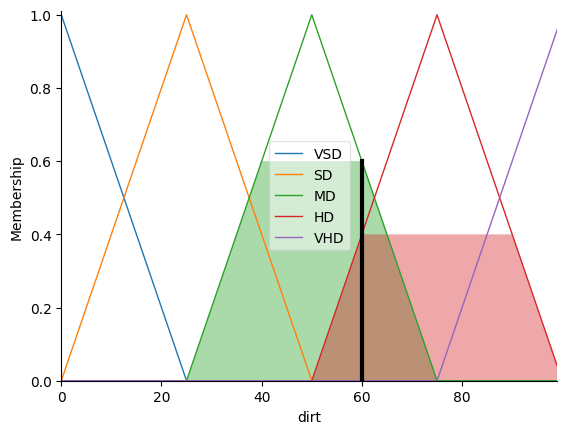

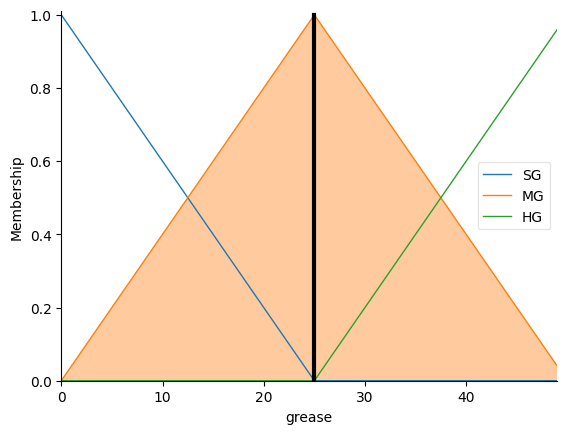

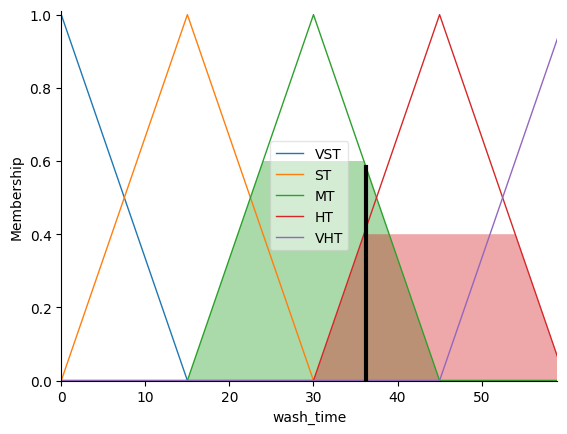

In [25]:
washing_machine = control.ControlSystemSimulation(control_system=wash_control_sys)

# Pass the dirt level and grease level

#dirt 0 to 100
dirt_list = [60]

#grease 0 to 50
grease_list = [25]




for dirt_val, grease_val in zip(dirt_list, grease_list):
    washing_machine.inputs({"dirt": dirt_val, "grease": grease_val})

    washing_machine.compute()
    print(
        "\n\tWash-time for Dirt = {} & Grease = {} is {}".format(
            dirt_val, grease_val, washing_machine.output["wash_time"]
        )
    )


    dirt.view(sim=washing_machine)

    grease.view(sim=washing_machine)

wash_time.view(sim=washing_machine)
